In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('./data_for_xi_calculation/dX_data_t=27.0_to_t=54.0_c=1by64.npz')

In [3]:
data.files

['dX_x', 'dX_y']

In [4]:
dX1 = data['dX_x']
dX2 = data['dX_y']

In [5]:
dX1.shape, dX2.shape

((46, 29120), (46, 29120))

In [6]:
from numpy import linalg as LA
from scipy import signal

In [7]:
Dt_c = 0.02
scaled_dX1 = dX1/np.sqrt(Dt_c)
scaled_dX2 = dX2/np.sqrt(Dt_c)

In [8]:
F1 = signal.detrend(scaled_dX1, axis=0, type='constant')
F1.shape

(46, 29120)

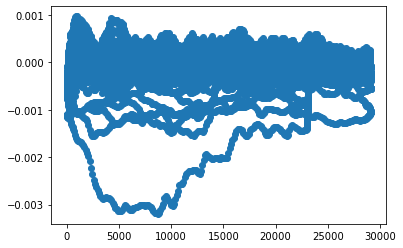

In [35]:
plt.scatter(np.arange(29120),(scaled_dX1 - F1)[0,:]) # plotting the column mean

In [9]:
F2 = signal.detrend(scaled_dX2, axis=0, type='constant')

In [10]:
Ax, bx, CxT = LA.svd(F1, full_matrices=False)
Ay, by, CyT = LA.svd(F2, full_matrices=False)

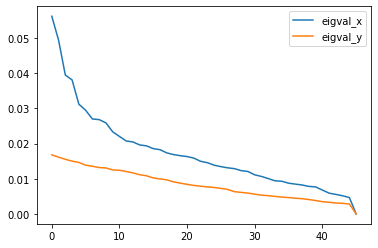

In [12]:
plt.plot(bx**2, label='eigval_x'), plt.plot(by**2, label='eigval_y')
plt.legend()

In [13]:
bx, by

(array([2.37089813e-01, 2.22335746e-01, 1.98704958e-01, 1.95212955e-01,
        1.76635245e-01, 1.71720677e-01, 1.64303414e-01, 1.63764287e-01,
        1.60900604e-01, 1.52849081e-01, 1.48437672e-01, 1.44040837e-01,
        1.43026360e-01, 1.40052322e-01, 1.39119714e-01, 1.36276829e-01,
        1.35149738e-01, 1.31745679e-01, 1.29878401e-01, 1.28685194e-01,
        1.27703150e-01, 1.25999260e-01, 1.22327423e-01, 1.20713406e-01,
        1.17719490e-01, 1.15945923e-01, 1.14487036e-01, 1.13477929e-01,
        1.10929579e-01, 1.09842043e-01, 1.05443981e-01, 1.03225145e-01,
        1.00303144e-01, 9.70312836e-02, 9.63636383e-02, 9.35170336e-02,
        9.20593286e-02, 9.07356154e-02, 8.84742920e-02, 8.76769888e-02,
        8.23866189e-02, 7.68495553e-02, 7.45057247e-02, 7.18165452e-02,
        6.82372520e-02, 1.44195431e-16]),
 array([1.29632722e-01, 1.27068833e-01, 1.24613253e-01, 1.22508096e-01,
        1.21016801e-01, 1.17727604e-01, 1.16439491e-01, 1.14814619e-01,
        1.14311636e-01

In [14]:
Bx = np.diag(bx)
By = np.diag(by)

In [15]:
Bx.shape, CxT.shape

((46, 46), (46, 29120))

In [16]:
BxCxT = np.matmul(Bx, CxT)
ByCyT = np.matmul(By, CyT)

In [17]:
np.allclose(F1, np.matmul(Ax, np.matmul(np.diag(bx), CxT))), np.allclose(F2, np.matmul(Ay, np.matmul(np.diag(by), CyT)))

(True, True)

In [18]:
var_x_vec = bx**2
var_y_vec = by**2

In [21]:
n_eigval = 44

p1 = 100*np.sum(var_x_vec[:n_eigval])/(np.sum(var_x_vec))
p2 = 100*np.sum(var_y_vec[:n_eigval])/(np.sum(var_y_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues x component: {p1}')
print(f'Total vairance captured by first {n_eigval} eigenvalues y component: {p2}')

Total vairance captured by first 44 eigenvalues x component: 99.4148571029706
Total vairance captured by first 44 eigenvalues y component: 99.26937550090783


In [22]:
n_eigval = 35

p1 = 100*np.sum(var_x_vec[:n_eigval])/(np.sum(var_x_vec))
p2 = 100*np.sum(var_y_vec[:n_eigval])/(np.sum(var_y_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues x component: {p1}')
print(f'Total vairance captured by first {n_eigval} eigenvalues y component: {p2}')

Total vairance captured by first 35 eigenvalues x component: 91.32566734768349
Total vairance captured by first 35 eigenvalues y component: 90.38440077558953


In [23]:
BxCxT.shape, BxCxT

((46, 29120),
 array([[ 4.25022069e-03,  4.15542182e-03,  1.80948720e-03, ...,
          1.46992811e-03,  5.54862862e-04,  5.14653626e-04],
        [-1.91412543e-03, -2.19524032e-03, -1.21874155e-03, ...,
         -7.44351919e-04,  5.53302078e-04,  5.73014014e-04],
        [ 1.47700990e-03,  1.57335560e-03,  2.33327849e-03, ...,
         -5.09314681e-04, -1.33791786e-03, -1.35364209e-03],
        ...,
        [-2.62221246e-05, -2.42999643e-05, -1.99396609e-05, ...,
          9.85226797e-05,  5.68863998e-05,  6.11053117e-05],
        [ 1.64369632e-04,  1.58812635e-04,  1.45323179e-04, ...,
          2.29142616e-05, -3.68275586e-05, -2.86517012e-05],
        [ 3.06765034e-17,  5.77922368e-18,  5.27893116e-17, ...,
          3.38986247e-20,  2.03026493e-19, -1.71093176e-18]]))

In [24]:
ByCyT.shape, ByCyT

((46, 29120),
 array([[-5.42122681e-18,  3.52324651e-18, -1.41318951e-04, ...,
          2.22033574e-04, -4.45219241e-18, -3.38556953e-18],
        [-4.46340050e-18,  1.82143515e-17,  6.89062816e-05, ...,
          4.70286886e-05,  4.02636377e-18,  3.70135234e-18],
        [ 2.41440044e-18, -2.95360690e-18,  3.96922496e-06, ...,
          5.15639255e-05, -3.98435888e-18, -3.53036929e-18],
        ...,
        [ 6.12854521e-18, -1.26796627e-18, -1.09328314e-05, ...,
         -1.64450220e-05, -3.78111011e-19, -3.31101414e-19],
        [-5.14319655e-18, -4.71002456e-18, -2.06209665e-05, ...,
         -1.41122545e-05,  1.31838481e-19,  9.89014283e-20],
        [-6.19401328e-18,  8.38466988e-18,  1.12146335e-17, ...,
         -2.08571570e-20,  1.25275531e-33, -1.82992731e-33]]))

In [25]:
CxT.shape

(46, 29120)

In [26]:
CyT.shape

(46, 29120)

In [27]:
stacked = np.stack((BxCxT, ByCyT), axis=-1)
stacked.shape

(46, 29120, 2)

In [28]:
xi_mat = stacked

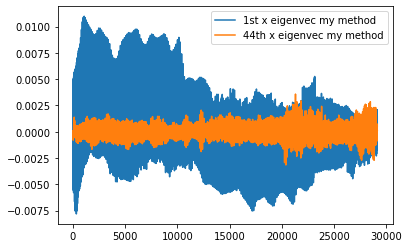

In [29]:
plt.plot(xi_mat[0,:,0], label='1st x eigenvec my method'), plt.plot(xi_mat[-3,:,0], label='44th x eigenvec my method')
plt.legend()

In [30]:
eig_vec = xi_mat[:44,:,:]
eig_vec.shape

(44, 29120, 2)

In [31]:
data_file = './xi_vec_data/xi_matrix_44_eigvec_my_method_c_1_by_64.npz'

np.savez(data_file, xi_mat = eig_vec)